## ASSIGNMENT 3

## Linear models for classification problems

Classification — The act of dividing an input space into a collection of labelled regions using decision boundaries. 

Linear Approach — Use of a straight line to partition a dataset. Intuitively this is easiest in terms of both describing the partition (“If it falls on one side of the line class as A, if it falls on the side class as B”) and performing the cut [1]. 

An example of discriminative training of linear classifiers is Logistic Regression [2].

Logistic regression—maximum likelihood estimation of $\vec{\mathbf{w}}$ assuming that the observed training set was generated by a binomial model that depends on the output of the classifier.

This assignment has 2 parts as follows:

**Part 1.** You will implement your own classifier for **Logistic Regression** (50 points) for 2 class classification using the dataset provided for Part 1 (pls. check the shared files). Check the performance of this algorithm with the classification accuracy.

**Part 2.** You will implement your own **Multinomial Logistic Regression** (50 points) classifier for multiclass data. The multinomial logistic regression algorithm is an extension to the logistic regression model that involves changing the loss function to cross-entropy loss and predicting the probability distribution as a multinomial probability distribution to natively support multi-class classification problems [3]. Check the performance of this algorithm with the classification accuracy.

**_Preprocessing the datasets_**:

**Encoding**

Machine learning models require all input and output variables to be numeric.

This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model. You can use One-Hot Encoding is available in the scikit-learn Python machine learning library via the OneHotEncoder class[4]. 

**Data standardization [5]**

Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. One of the most popular techniques for scaling numerical data prior to modeling is standardization. 

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values ($\mu$) is 0 and the standard deviation ($\sigma$) is 1. A value is standardized as follows:

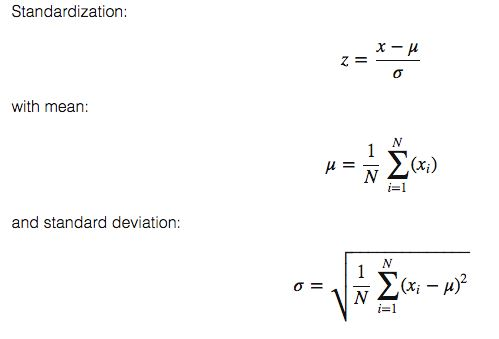

This can be thought of as subtracting the mean value or centering the data.

**Important Remarks:**

You are provided the necessary preprocessing codes as separate notebooks for both datasets that you are going to work with in this assignment. Please check the shared notebooks first before beginning to work with your own algorithms. Note that, in these notebooks, you are also provided with the binary and multinomial logistic regression performances of  of the sklearn library as a baseline for your own implementations. You will be implementing your own solutions that comprise of the necessary training procedures and the codes to train your models for each part before submission.  

**Steps for all parts:**

- Check the data has any null values or not. 
- Check if in the data, some of our columns have numeric values and some of them have categorical values.  To work with categorical variables you need to encode them to prepare this data for the machine learning algorithms.
- Split your data into train and test sets with a ratio of 80:20 with seed=1.
- Apply the data standardization technique to the datasets to standardize the input variables.
- Build your models with your own implemenation (with proper comments and explanations) using the training set.
- Report these classification models according to their accuracy over the test set. Comment on their classification performance.
- Finally, plot confusion matrices for your models over the test set, and comment on the outcomes.



[1]: https://towardsdatascience.com/classification-a-linear-approach-part-1-b080c13992dd

[2]: https://en.wikipedia.org/wiki/Linear_classifier

[3]: https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

[4]: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

[5]: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

In [2]:
# Code here for data loading and preprocessing (You can enlarge the cell as much as you want.)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Libraries
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('Part1_Invistico_Airline.csv')

data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median())

def object_cols(df):
    return list(df.select_dtypes(include='object').columns)

def numerical_cols(df):
    return list(df.select_dtypes(exclude='object').columns)

obj_col = object_cols(data)
num_col = numerical_cols(data)

le = LabelEncoder()
norm = Normalizer()

for col in obj_col:
    data[col] = le.fit_transform(data[col])

data[num_col] = norm.fit_transform(data[num_col])

X_data = data.drop(['satisfaction'], axis = 1)
y_data = data['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=1)

In [7]:
# Code here for Logistic Regression (You can enlarge the cell as much as you want.)

col_len = len(X_train.columns)
gradients = [1 for i in range(0,col_len)]
learning_rate = 0.05
bias = 0
cols = []
for i in X_train:
    cols.append(i)


def sigmoid_fnc(z):
    return 1/(1+math.exp(-z))

def compute_z_value(lst):
    sum = 0
    for i in range(0, len(gradients)):
        sum += gradients[i]*lst[i]
    return sum + bias
    
    
def find_optimum_gradients():
    for i in range(0, len(X_train)):
        temp = X_train.iloc[i]
        tList = []
        for k in cols:
            tList.append(temp[k])
        
        z_val = compute_z_value(tList)
        for k in range(0, len(gradients)):
            gradients[k] = gradients[k] + (learning_rate * (tList[k] * (y_train.iloc[i] - sigmoid_fnc(z_val))))
        

def predict(lst):
    z_val = compute_z_value(lst)
    predicted_val = sigmoid_fnc(z_val)
    
    if z_val >= 0.5:
        return 1
    else:
        return 0
    
        
find_optimum_gradients()
#print(gradients)


for i in gradients:
    bias += i
bias = bias / len(gradients)
        
        
correct_ones = 0
for i in range(0, len(X_test)):
    temp = X_test.iloc[i]
    t = []
    for k in cols:
        t.append(temp[k])
        
    if predict(t) == y_test.iloc[i]:
        correct_ones += 1

print((correct_ones*100) / len(y_test))    

74.5103700495645


In [41]:
# Code here Multinomial Logistic Regression (You can enlarge the cell as much as you want.)

